In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\student\Desktop\Vedant\adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

In [5]:
data['workclass']= le.fit_transform(data['workclass'])
data['education']= le.fit_transform(data['education'])
data['marital.status']= le.fit_transform(data['marital.status'])
data['occupation']= le.fit_transform(data['occupation'])
data['relationship']= le.fit_transform(data['relationship'])
data['race']= le.fit_transform(data['race'])
data['sex']= le.fit_transform(data['sex'])
data['native.country']= le.fit_transform(data['native.country'])
data['income']= le.fit_transform(data['income'])



In [6]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [7]:
data['income'].unique()

array([0, 1])

In [8]:
from sklearn.ensemble import AdaBoostClassifier

y = data['income']
x = data.drop('income', axis=1)

In [9]:
x

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39


In [10]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [30]:
adb = AdaBoostClassifier(n_estimators=100,learning_rate=1)
adb.fit(x_train,y_train)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [31]:
pred = adb.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,pred)

In [33]:
print(acc)

0.8676493167511131


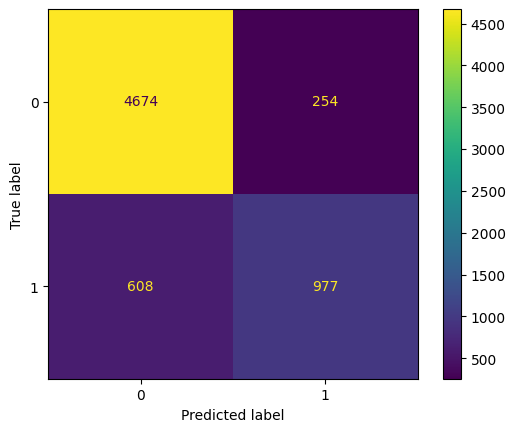

In [34]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [19]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

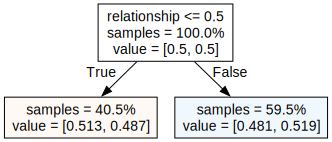

In [20]:
tree = adb.estimators_[99]
dot_data = export_graphviz(tree,
                           feature_names=x_train.columns,  
                           filled=True,  
                           max_depth=30, 
                           impurity=False, 
                           proportion=True)
graph = graphviz.Source(dot_data)
# graph.render(filename='decision_tree_3', format='png', cleanup=True)
display(graph)

In [35]:
from sklearn.metrics import f1_score

f = f1_score(y_test,pred)
print(f)

0.6938920454545454
